In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import networkx as nx
import osmnx as ox
import plotly.express as px
import folium
ox.config(use_cache=True, log_console=True)

# Load in London Data

In [2]:
G = nx.read_gpickle("data/london_graph.gpickle")

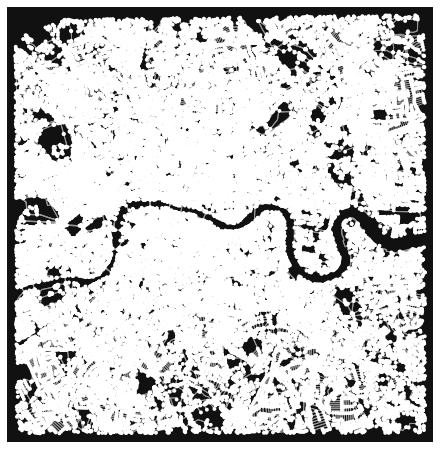

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
ox.plot_graph(G)

# Manually Draw Shape (Square)

In [53]:
# TL = (51.49596481, 0.01243080)
# BR = (51.54100795, -0.14281134)

TL = (51.55, -0.14)
BR = (51.45, -0.06)

TR = (TL[0], BR[1])
BL = (BR[0], TL[1])

In [54]:
tl_node = ox.get_nearest_node(G, TL)
tr_node = ox.get_nearest_node(G, TR)
br_node = ox.get_nearest_node(G, BR)
bl_node = ox.get_nearest_node(G, BL)

waypoints = (tl_node, tr_node, br_node, bl_node)

### Create route between vertices

In [55]:
route = []

for i, way in enumerate(waypoints):
    print(i, (i + 1) % len(waypoints))
    subroute = nx.shortest_path(G, waypoints[i], waypoints[(i + 1)% len(waypoints)], weight='distance')
    route.extend(subroute[:-1])

0 1
1 2
2 3
3 0


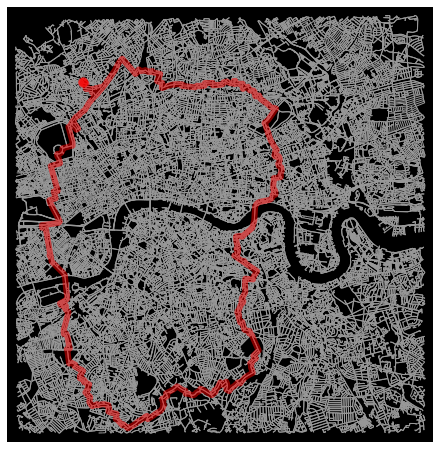

In [56]:
ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k');

In [36]:
nodes, edges = ox.graph_to_gdfs(G)

In [42]:
edges[edges['geometry'].isnull()]

,,,osmid,name,highway,access,oneway,length,speed_kph,travel_time,maxspeed,geometry,lanes,ref,bridge,junction,service,tunnel,width,est_width,area
u,v,key,,,,,,,,,,,,,,,,,,,


In [43]:
nodes[nodes['geometry'].isnull()]

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
